In [24]:
## import required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

In [25]:
## read the dataset

data=pd.read_csv("C:\\Users\\sony\\A_MACHINE LEARNING AND DEEP LEARNING- INEURON\\Banking Dataset Classification\\Data_Set\\Train_dataset.csv")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [26]:
## Description about the dataframe:

print("Variable present in the DataFrame",data.columns)
print("\n",70*"=")
print("Information about DataFrame: ",data.info())
print("\n",70*"=")
print("Shape of the DataFrame ROWS {a} and COLUMNS {b} ".format(a=data.shape[0],b=data.shape[1]))
print("\n",70*"=")
print("Check data types of all columns",data.dtypes)

Variable present in the DataFrame Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null

In [27]:

data.describe()


# Description About The Dataset (statistical summary of the dataframe or series): 

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [28]:
data.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


Number of missing values each columns:  
 age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


Percentage of missing value in age            0.0
job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
duration       0.0
campaign       0.0
pdays          0.0
previous       0.0
poutcome       0.0
y              0.0
dtype: float64 %


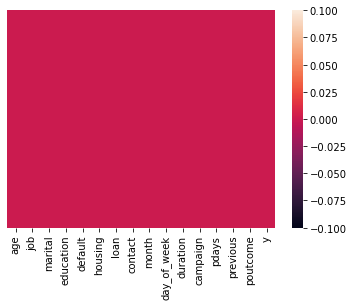

In [29]:
## Check the missing values:

print("Number of missing values each columns: ","\n",data.isnull().sum())

sns.heatmap(data.isnull(), yticklabels=False)

# shows that those column missing values

print("\n")

print("Percentage of missing value in {a} %".format(a=data.isnull().sum()/len(data)))

Note: The dataset set did not contain any missing values.

In [30]:
### Check the categorical Features from the dataset
category_features=[]
thresold=12    # Those Features nunique values are less than 10 , consider as categorical features
for each in data.columns:
    if data[each].nunique()<= thresold:
        category_features.append(each)
        
for each in category_features:
    data[each]=data[each].astype("category")
    
print("Number of Categorical column from the dataframe:",len(category_features))
print("\n")
print("Category Features are: ", category_features)
print("\n")
print("Categorical:","\n",data.nunique()<=12)

Number of Categorical column from the dataframe: 12


Category Features are:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'previous', 'poutcome', 'y']


Categorical: 
 age            False
job             True
marital         True
education       True
default         True
housing         True
loan            True
contact         True
month           True
day_of_week     True
duration       False
campaign       False
pdays          False
previous        True
poutcome        True
y               True
dtype: bool


In [31]:
data["job"].nunique()

12

In [32]:
for i in data.columns:
    print(data[i].nunique())

75
12
4
8
3
3
3
2
10
5
1467
40
27
8
3
2


In [33]:
for i in data.columns:
    print(data[i].value_counts())

31    1551
32    1474
33    1443
35    1417
34    1404
      ... 
17       3
89       2
87       1
91       1
98       1
Name: age, Length: 75, dtype: int64
admin.           8314
blue-collar      7441
technician       5400
services         3196
management       2345
retired          1366
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64
university.degree      9736
high.school            7596
basic.9y               4826
professional.course    4192
basic.4y               3322
basic.6y               1865
unknown                1397
illiterate               16
Name: education, dtype: int64
no         26007
unknown     6940
yes            3
Name: default, dtype: int64
yes        17254
no         14900
unknown      796
Name: housing, dtype: int64
no         27131
yes         5023
unknown  